In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import math

# Load MNIST dataset
(x_train, y_train), (x_val, y_val) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_val = x_val.reshape(x_val.shape[0], w, h, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

model = Sequential()

# First convolutional layer
model.add(Conv2D(16, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1), name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output before passing to Dense
model.add(Flatten())

# Add a Dense layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))  # using softmax activation function because it's a multi-class problem

# More layers...

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=500)

# Display the learned kernels for the first convolutional layer
weights = model.get_layer('conv1').get_weights()[0]

# Normalize the weights for visualization
weights = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))


# Function to display montage of filters
def display_filters(weights):
    num_filters = weights.shape[-1]
    num_grids = math.ceil(math.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)

    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            img = weights[:, :, 0, i]
            ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()


# Display filters
display_filters(weights)

Epoch 1/5
120/120 [==============================] - 78s 643ms/step - loss: 0.4416 - accuracy: 0.8694 - val_loss: 0.1681 - val_accuracy: 0.9509
Epoch 2/5
120/120 [==============================] - 82s 685ms/step - loss: 0.1429 - accuracy: 0.9571 - val_loss: 0.0995 - val_accuracy: 0.9692
Epoch 3/5
120/120 [==============================] - 83s 693ms/step - loss: 0.0854 - accuracy: 0.9752 - val_loss: 0.0696 - val_accuracy: 0.9781
Epoch 4/5
120/120 [==============================] - 88s 732ms/step - loss: 0.0601 - accuracy: 0.9819 - val_loss: 0.0560 - val_accuracy: 0.9813
Epoch 5/5
120/120 [==============================] - 74s 619ms/step - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0479 - val_accuracy: 0.9850


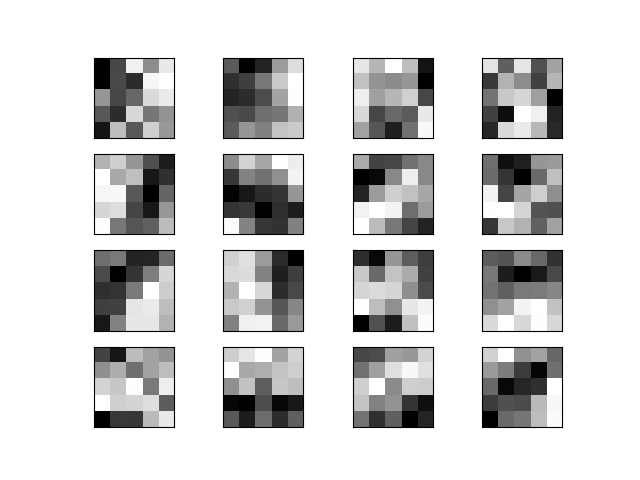

In [4]:
from IPython.display import Image
Image(filename='Figure_1.png',width=800, height=400)